![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-06 </span><h2>
</div>

---
---

## K-Means Clustering
**K-means** is a clustering algorithm typically used for unsupervised
machine learning task.

K-Means finds the best centroids by alternating between two
steps.
1. The first step assigns data points to clusters based on the
current centroids.
2. The second step updates the centroids based on the current
assignment of data points to clusters.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In this exercise, you will be implementing the K-Means Clustering Algorithm on a randomly generated dataset. \\
Step 1: Initialize Random Points

In [ ]:
points = np.vstack(((np.random.randn(50, 2) * 0.45 + np.array([1, 0])),
                    (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                    (np.random.randn(50, 2) * 0.35 + np.array([-0.5, -0.5]))))

print(r'data shape', points.shape)

data shape (150, 2)


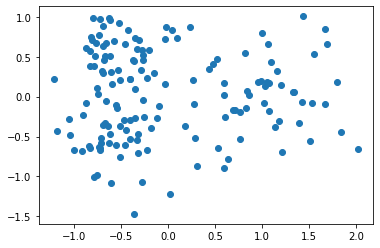

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

Step 2: Write a function to initialize random centroids.

In [ ]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
centroids = initialize_centroids(points, 3)
print(centroids.shape)
centroids

(3, 2)


array([[-0.25796144, -0.2568378 ],
       [ 1.53045081, -0.08096618],
       [-0.5465082 , -0.60422681]])

Step 3: Write a function to assign each data sample to one of the initialized centroids.

In [ ]:
# Broadcast to (3,1,2) to be able to minus with points which is (1,150,2)
print(centroids[:, np.newaxis].shape)
centroids[:, np.newaxis]

# After subtracting on the axis 2 we can get (3,150)
# Then we take the arg min on axis 0 to get (150,)

(3, 1, 2)


array([[[-0.25796144, -0.2568378 ]],

       [[ 1.53045081, -0.08096618]],

       [[-0.5465082 , -0.60422681]]])

In [ ]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

closest = closest_centroid(points, centroids)
closest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2])

Step 4: Write a function that would update the centroids based on the assigned closest points.

In [ ]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

new_centers = move_centroids(points, closest, centroids)
new_centers

array([[-0.29628711,  0.29581886],
       [ 1.20986309,  0.05862634],
       [-0.66112005, -0.60256649]])

Step 5: Run your clustering algorithm and show the points and the learned centroids after 50 iteration.

initial centers  [[-0.48401857  0.04243636]
 [-0.72133663 -0.1358556 ]
 [-1.10751857 -0.51514743]]
Final centers  [[ 1.12723149  0.0721233 ]
 [-0.54932227  0.37177727]
 [-0.48872348 -0.55846298]]


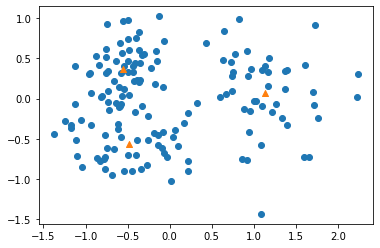

In [ ]:
c = initialize_centroids(points, 3)
print(r'initial centers ', c)
for i in range(50):
    closest_centroid(points, c)
    c = move_centroids(points, closest_centroid(points, c), c)

print(r'Final centers ', c)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(c[:, 0], c[:, 1], marker='^')
plt.show()

Task: Try with different number of clusters and interpret the result

## K-Means Clustering with Python Sklearn

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

###Load Dataset

Let us load the dataset into a dataframe and take a look at some of its rows. Also with the shape function, it can be seen that it has 4 columns and 200 rows.

In [ ]:
df = pd.read_csv(r"Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


###Objective

Customer segmentation deals with grouping clusters together based on some common patterns within their attributes. To keep the example simple and to visualize the clustering on a 2-D graph we will use only two attributes Annual Income and Spending Score.

###Apply Feature Scaling

Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. This is because clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale.

We will use MinMaxScaler for our example. In the new dataframe df_scale it can been seen that both attributes Annual Income and Spending Score are normalized.

In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['AnnualIncome','SpendingScore']])
df_scale = pd.DataFrame(scale, columns = ['AnnualIncome','SpendingScore']);
df_scale.head(5)

,AnnualIncome,SpendingScore
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Apply Kmeans with 2 Clusters (K=2)
Let us see how to apply K-Means in Sklearn to group the dataset into 2 clusters (0 and 1). The output shows the cluster (0th or 1st) corresponding to the data points in the dataset.

In [ ]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['AnnualIncome','SpendingScore']])
y_predicted

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

To find the centroid of the two clusters the attribute cluster_centers_  can be used as shown below

In [ ]:
km.cluster_centers_

array([[0.36929553, 0.31163817],
       [0.37861485, 0.73950929]])

Finally, let us visualize the results. 




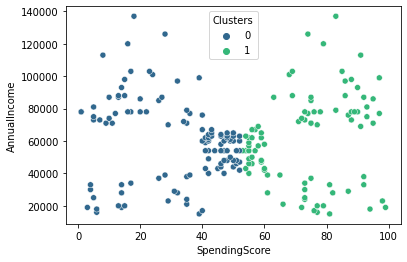

In [ ]:
df['Clusters'] = km.labels_
sns.scatterplot(x='SpendingScore', y='AnnualIncome', hue = 'Clusters', data=df,palette='viridis')


From the graph, it is evident that there is a scope for data to be grouped into more clusters than only 2. But how to know how many clusters? \\
Task: Try with different values of K. Next week, we will use clustering assesment metrics to improve clustering performance.

## Hierarchical clustering
https://towardsdatascience.com/hierarchical-clustering-explained-e58d2f936323

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. \\
• There are two strategies for building the hierarchy of clusters: \\
**Agglomerative** (bottom-up): we start with each point in its own cluster and
we merge pairs of clusters until only one cluster is formed \\
**Divisive** (top-down): we start with a single cluster containing the entire set of points and we recursively split until each points is in its own cluster \\
• The most popular strategy in practical use is bottom-up (agglomerative).

![picture](https://miro.medium.com/max/1400/1*ICdqpcL62G1q_kIlVszrrg.png)

## Agglomerative clustering
Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined. Let’s go over an example to explain the concept clearly.

We have a dataset consists of 9 samples. I choose numbers associated with these samples to demonstrate the concept of similarity. At each iteration (or level), the closest numbers (i.e. samples) are combined together. As you can see in the figure below, we start with 9 clusters. The closest ones are combined at the first level and then we have 7 clusters. The number of black lines that intersect with blue lines represents the number of clusters.

![picture](https://miro.medium.com/max/1298/1*8q47aniCkl21w9R4H0OCYQ.png)

The figure above is called dendrogram which is a diagram representing tree-based approach. In hierarchical clustering, dendrograms are used to visualize the relationship among clusters.

As we go up, the number of clusters decreases as more samples are combined. After level 6, all samples are combined under one big cluster.

One of the advantages of hierarchical clustering is that we do not have to specify the number of clusters beforehand. However, it is not wise to combine all data points into one cluster. We should stop combining clusters at some point. Scikit-learn provides two options for this:

1. Stop after a number of clusters is reached (n_clusters)
2. Set a threshold value for linkage (distance_threshold). If the distance between two clusters are above the threshold, these clusters will not be merged.


##Compare different hierarchical linkage methods on toy datasets

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

• **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

• **Complete linkage** minimizes the maximum distance between observations of pairs of clusters.

• **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

• **Single linkage** minimizes the distance between the closest observations of pairs of clusters.


In [ ]:
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(0)

## Creating Datasets

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05) # dataset 1
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05) # dataset 2
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8) # dataset 3
no_structure = np.random.rand(n_samples, 2), None # dataset 4

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y) # dataset 5

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state) # dataset 6

###Run the clustering and plot

In [ ]:
np.array(list(islice(cycle(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628","#984ea3","#999999","#e41a1c","#dede00"]),
                    int(5))))

array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'], dtype='<U7')

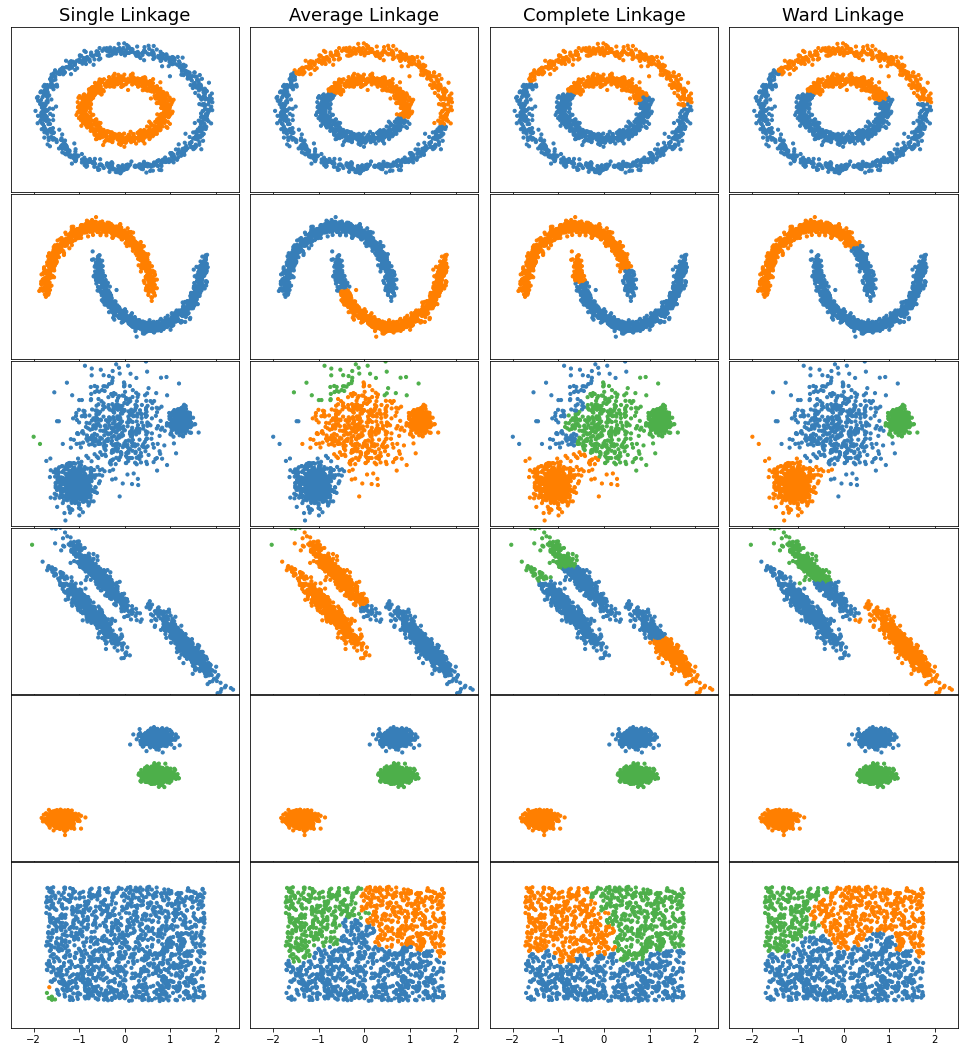

In [ ]:
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [(noisy_circles, {"n_clusters": 2}),(noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),(aniso, {"n_neighbors": 2}),(blobs, {}),(no_structure, {}),]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="average")
    single = cluster.AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="single")

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward))

    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0: plt.title(name, size=18)

        colors = np.array(list(islice(cycle(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628","#984ea3","#999999","#e41a1c","#dede00"]),
                    int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.yticks(())
        plot_num += 1

plt.show()

### Tasks:
Interpret the effectiveness of each linkage method for different datasets . \\
Measure and compare the runtime of the different hierachical clustering methods.